In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter

In [69]:

def mean(lst):
    if len(lst)>0:
        return sum(lst)/len(lst)
    else:
        print("mean function error, length must not be zero.")
        return None

def MovingStd(lst,period):
    k = []
    k.append(0)
    for i in range(1,len(lst)):
        if i < period:
            k.append(np.std(lst[:i]))
        else:
            k.append(np.std(lst[i-period+1:i+1]))
            
    return np.array(k)

def vwap(lst1,lst2):

    if len(lst1) != len(lst2):
        print("Vwap failed. length not matched.")
        return None 

    sum_ = 0
    price = 0 
    for i in range(len(lst1)):
        price += lst1[i]*lst2[i] 
        sum_ += lst2[i]
    return round(price/sum_,2)

def vwap_multiperiods(vwaps,vols):

    if len(lst1) != len(lst2):
        print("Vwap failed. length not matched.")
        return None 

    return vwap(vwaps,vols)


def roc(lst1):
    lst =[]
    lst.append(0)
    lst.extend(np.diff(lst1))
    
    return np.array(lst)


def SMA(lst,n):
    lst1= []
    lst1.append(lst[0])
    for i in range(1,len(lst)):
        if i < n:
            lst1.append(mean(lst[:i+1]))
        else:
            lst1.append(mean(lst[i-n+1:i+1]))
            
    return np.array(lst1)

def EMA(lst,n):
    weight= []
    for i in range(n):
        weight.append(2**i)

    Sum = sum(weight)
    normalize = np.array(weight)/Sum

    EMA =[]

    lst = SMA(lst,n)

    EMA.append(lst[0])
    for i in range(1,len(lst)):
        if i<n-1:
            EMA.append(sum(lst[:i+1]*normalize[:i+1])/sum(normalize[:i+1]))
        else:
            EMA.append(sum(lst[i-n+1:i+1]*normalize))

    return EMA

def cor(lst1,lst2):

    if len(lst1)!=len(lst2):
        print("Correlation calculation failed, length not matched")
        return None 
    else:
        return(pearsonr(lst1,lst2)[0])

def cor_period(lst1,lst2,period):

    if len(lst1)!=len(lst2):
        print("Correlation calculation failed, length not matched")
        return None 
    else:
        return(pearsonr(lst1[:-period],lst2[:-period])[0])


def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)


#### String, milisecond => timestamp 
def get_milisec(time_str,mili):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return 1000*(int(h) * 3600 + int(m) * 60 + int(s))+int(mili)


# import datetime
# now = datetime.datetime.now()

# time = '{}:{}:{}'.format('{:02d}'.format(now.hour), '{:02d}'.format(now.minute),  '{:02d}'.format(now.second))

# print(time)
from matplotlib.dates import bytespdate2num, num2date
from matplotlib.ticker import Formatter
class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%m/%d/%Y %H:%M'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        return num2date(self.dates[ind]).strftime(self.fmt)

In [135]:
GAP =pd.read_csv('data/SPYQQQpair.csv')
GAP[:5]


,Unnamed: 0,timestamp,price_gap,close_x,close_y
0,0,09/04/2020 04:00,58.51,345.61,287.10
1,1,09/04/2020 04:01,58.50,345.62,287.12
2,2,09/04/2020 04:02,58.40,345.61,287.21
3,3,09/04/2020 04:03,58.70,345.66,286.96
4,4,09/04/2020 04:04,58.77,345.36,286.59


In [89]:
week = 960*5
month_dates = pd.to_datetime(GAP["timestamp"],format='%m/%d/%Y %H:%M')
month_GAP = GAP["price_gap"]
week_dates = month_dates[-week:]
week_GAP = month_GAP[-week:]

In [147]:
w_dat = np.array([np.float32(i) for i in range(len(week_dates))])
w_linefit = np.polyfit(w_dat,week_GAP,1)
w_slope = np.float32(w_linefit[0])
w_intcep = np.float32(w_linefit[1])
w_regression_line = w_intcep+w_slope*w_dat

w_STD = MovingStd(week_GAP,120)
w_SMA = SMA(list(week_GAP),120)

m_dat = np.array([np.float32(i) for i in range(len(month_dates))])
m_linefit = np.polyfit(m_dat,month_GAP,1)
m_slope = np.float32(m_linefit[0])
m_intcep = np.float32(m_linefit[1])
m_regression_line = m_intcep+w_slope*m_dat

m_STD = MovingStd(month_GAP,360)
m_SMA = SMA(list(month_GAP),360)

In [148]:
def equidate_ax(fig, ax, dates, fmt="%m-%d"):    
    N = len(dates)
    def format_date(index, pos):
        index = np.clip(int(index + 0.5), 0, N - 1)
        return dates[index].strftime(fmt)
    ax.xaxis.set_major_formatter(FuncFormatter(format_date))
    ax.set_xlabel("dates")
    fig.autofmt_xdate()

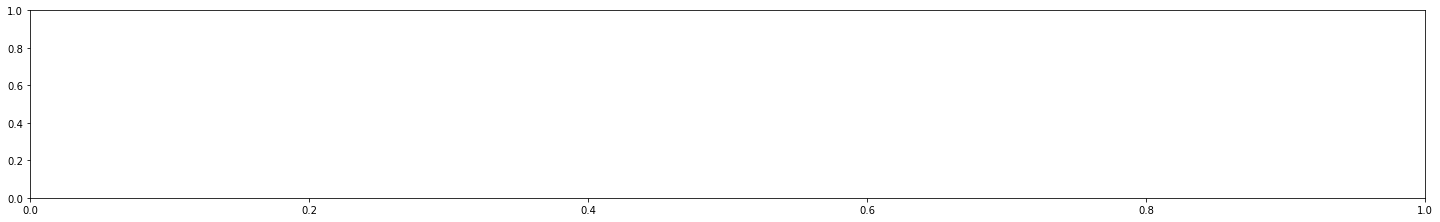

In [176]:
f = plt.figure(figsize=(25,20))



w_spread = f.add_subplot(512)
#d=np.arange(len(week_dates))
# w_spread.set_title("Intraday Spread - Past one Week",fontsize=8)
# w_spread.plot(d,week_GAP,"r",label="Spread")
# w_spread.plot(d,w_SMA,"c",label="Spread SMA10")
# w_spread.plot(d,w_regression_line,"b",label="Regression line",linewidth=1)
#w_spread.fill_between(d, w_regression_line-2*w_STD,w_regression_line+2*w_STD,alpha=0.23,label="Price gap deviation zone")
#equidate_ax(f,w_spread,list(week_dates))

#w_spread.fill_between(d, d-2*50,d+2*50,alpha=0.9,label="Price gap deviation zone")

# m_spread = f.add_subplot(513)
# d=np.arange(len(month_dates))
# m_spread.set_title("Intraday Spread - Past one month",fontsize=8)
# m_spread.plot(d,month_GAP,"r",label="Spread")
# m_spread.plot(d,m_SMA,"c",label="Spread SMA10")
# m_spread.plot(d,m_regression_line,"b",label="Regression line",linewidth=1)
# m_spread.fill_between(d, m_regression_line-2*m_STD,m_regression_line+2*m_STD,alpha=0.23,label="Price gap deviation zone")
# equidate_ax(f,m_spread,list(month_dates))

a=[1,2,3]
b=[4,5,6]

m_spread.fill_between(b,np.array(b)-1,np.array(b)+1,alpha=0.23,label="Price gap deviation zone")

plt.show()

In [61]:
np.arange(len(week_dates))


array([   0,    1,    2, ..., 4797, 4798, 4799])

In [171]:

plt.show()

In [164]:
d=np.arange(2,5)

In [165]:
d

array([2, 3, 4])

In [158]:
d = np.append(d,[5])

In [159]:
d

array([0, 1, 2, 3, 4, 5])